In [1]:
# Importing the libraries

import pandas as pd
import numpy as np

In [2]:
# Importing the schemas

schema = pd.read_csv('survey_results_schema.csv')

schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...


In [3]:
# Importing the results

data = pd.read_csv('survey_results_public.csv')

data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
# Checking the columns in the results dataframe

data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

<h3>1. Find the average age of developers when they wrote their first line of code.<h3>

In [5]:
# Making a copy of the dataframe

data_copy = data.copy(deep=True)


# Filtering out the developers from the dataframe
data_copy = data_copy[data_copy["MainBranch"]== "I am a developer by profession"]


#Removing the NaN values from the 'Age1stCode' column
age = data_copy['Age1stCode'].dropna()

age.unique()

array(['16', '14', '17', '11', '20', '18', '13', '12', '19', '21', '8',
       '35', '10', '6', '15', '7', '9', '5', '23', '22', '30', '29', '27',
       '24', 'Younger than 5 years', '33', '25', '26', '36', '28', '31',
       '32', '37', '50', '65', '34', '40', '43', '38', '51', '41', '55',
       '39', '83', '42', '45', 'Older than 85', '48', '44', '60', '79',
       '46', '49'], dtype=object)

In [6]:
# Replacing the string values with integer values

age.replace('Younger than 5 years', '4', inplace=True)
age.replace('Older than 85', '86', inplace=True)


# Calculating the mean of all the ages
age = pd.to_numeric(age, errors='coerce')

In [7]:
# Result

age.mean()

15.309303076426364

<h3> 2. Deduce the percentage of developers who knew python in each country. <h3>

In [8]:
# Making a copy of the dataframe

data_copy2 = data.copy(deep=True)
data_copy2["LanguageWorkedWith"].isna().sum()

1314

In [9]:
# Removing NaN values from the 'LanguageWorkedWith' column

data_copy2 = data_copy2[data_copy2["LanguageWorkedWith"].isna() != 1]
data_copy2["LanguageWorkedWith"].isna().sum()

0

In [10]:
# Filtering all the developers from the dataframe

data_copy2 = data_copy2[data_copy2["MainBranch"]== "I am a developer by profession"]


# Creating a new column which contains boolean values for python
data_copy2["knows_python"] = data_copy2["LanguageWorkedWith"].str.contains("python", case=False, na=False).astype(int)

In [11]:
# Storing 'Country' and 'knows_python' columns in a new variable

developers = data_copy2[["Country", "knows_python"]]


# Filtering developers who know python
developer_worked_with_python = developers[developers["knows_python"]==1]

In [12]:
# Grouping all the developers by countries

developers = developers.groupby(["Country"]).count()


# Grouping all the developers who know python by countries
developer_worked_with_python = developer_worked_with_python.groupby(["Country"]).count()

In [13]:
# Calculating the percentage of developers know python in each country

percent_of_developers_in_each_country = developer_worked_with_python/developers*100

In [14]:
# Result

percent_of_developers_in_each_country

,knows_python
Country,
Afghanistan,5.000000
Albania,24.615385
Algeria,32.727273
Andorra,NaN
Angola,50.000000
...,...
"Venezuela, Bolivarian Republic of...",27.118644
Viet Nam,34.328358
Yemen,33.333333


<h3> 3. Generate the report for the average salary of developers based on the continent. <h3>

In [15]:
# Making a copy of the dataframe

data_copy3 = data.copy(deep=True)

In [16]:
# Filtering out oulier behavior

data_copy3 = data_copy3[data_copy3["Country"]!= 'Other Country (Not Listed Above)']


# Filtering out developers
data_copy3 = data_copy3[data_copy3["MainBranch"]== "I am a developer by profession"]

In [17]:
# Add Continent Column 

continent = pd.read_csv("Countries-Continents.csv")


# Checking for contradictory names in both 'Country' columns
diff_country = []
for country in data_copy3['Country']:
    for country1 in continent['Country']:
        if country not in country1:
            diff_country.append(country)
            break
    break
        
diff_country

['United States']

In [18]:
# Changing the name

data_copy3.replace('United States', 'US', inplace=True)

In [19]:
# Merging the continent variable with the dataframe

data_copy3 = data_copy3.merge(continent, how ="left", on=["Country"])

In [20]:
# Selecting salary and continent columns

data_developers = data_copy3[["ConvertedComp", "Continent"]]

In [21]:
# Grouping based on continent with average salary

avg_salary = data_developers.groupby(["Continent"]).mean()

In [22]:
# Renaming column

avg_salary = avg_salary.rename(columns={'ConvertedComp':'Avg_Salary_in USD'})

In [23]:
# Result

avg_salary

,Avg_Salary_in USD
Continent,
Africa,34818.760538
Asia,35276.307341
Europe,101013.516384
North America,227745.883865
Oceania,167614.534447
South America,33338.938628


<h3> 4. Based on this survey, what will be the most desired programming language for the year  2020? <h3>

In [24]:
# Making a copy of the dataframe

data_copy4 = data.copy(deep=True)
data_copy4["LanguageDesireNextYear"].isna().sum()

4795

In [25]:
# Removing NaN values from the 'LanguageDesireNextYear' column

data_copy4 = data_copy4[data_copy4["LanguageDesireNextYear"].isna() != 1]
data_copy4["LanguageDesireNextYear"].isna().sum()

0

In [26]:
# Splitting all the language names and appending them into a list

list = []
for l in data_copy4["LanguageDesireNextYear"]:
    x = l.split(";")
    for i in x:
        list.append(i)

In [27]:
# Converting the list into a pandas series

lang = pd.Series(list)


# Counting and displaying each programming language
lang.value_counts()

JavaScript               44739
Python                   40006
HTML/CSS                 36645
SQL                      33566
TypeScript               23720
Java                     23508
C#                       22449
Bash/Shell/PowerShell    21303
Go                       17060
C++                      16856
Kotlin                   13261
PHP                      12837
C                        11143
Rust                     10497
Swift                     8800
WebAssembly               8440
Other(s):                 7912
Ruby                      7251
R                         6734
Scala                     5562
Assembly                  4659
Dart                      4429
Elixir                    3788
F#                        3521
Objective-C               2851
Clojure                   2752
Erlang                    2124
VBA                       1641
dtype: int64

<AxesSubplot:>

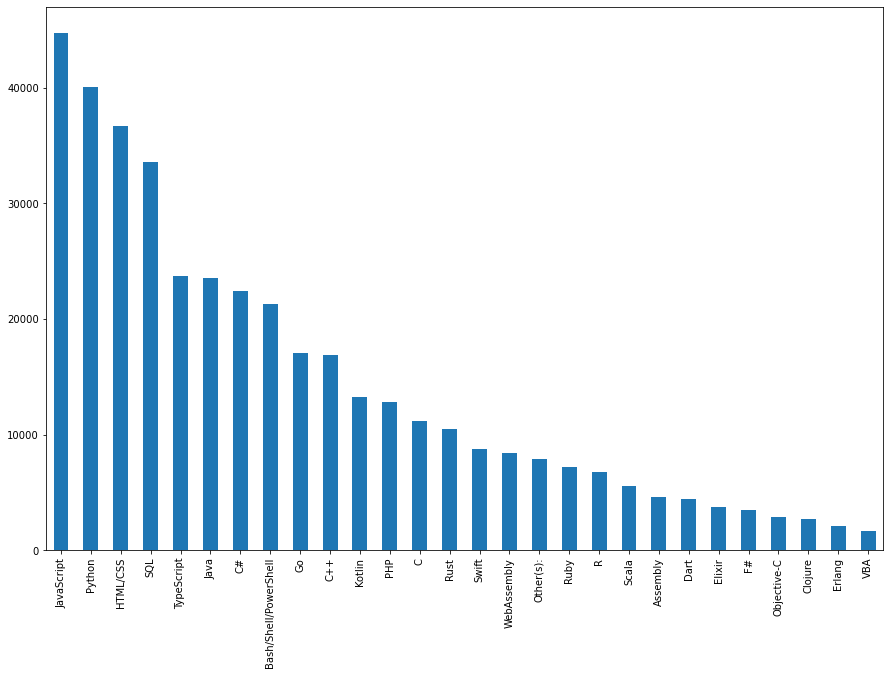

In [28]:
# Displaying the result with the help of a bar plot

lang.value_counts().plot(kind="bar", figsize = (15, 10))

<h3> 5. Generate the report for the people who code as a hobby based on their gender and continent. <h3>

In [29]:
# Making a copy of the dataframe

data_copy5 = data_copy3.copy(deep=True)

data_copy5['Gender'].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [30]:
# Creating a new Category 'OTHERS' for ambiguous values

data_copy5['Gender'].mask(data_copy5["Gender"].str.contains(";", case=False, na=False) == True,  "OTHERS", inplace=True)
data_copy5['Gender'].mask(data_copy5["Gender"].str.contains(",", case=False, na=False) == 1,  "OTHERS", inplace=True)

In [31]:
# Storing all data grouped by "Gender" & "Continent" in a new variable

Hobby_info = data_copy5.groupby(["Gender", "Continent"]).sum()

In [32]:
# Result

Hobby_info

Respondent     CompTotal  ConvertedComp    WorkWeekHrs  \
Gender Continent                                                               
Man    Africa           64486702  6.180691e+09   3.419724e+07   48736.250000   
       Asia            541476454  7.245597e+10   2.762018e+08  426767.730000   
       Europe         1006012685  1.467825e+09   1.882804e+09  893687.764500   
       North America   745831449  1.000000e+16   3.301738e+09  646560.600005   
       Oceania          72423910  1.320311e+08   2.223545e+08   60146.750000   
       South America   110150996  2.150910e+09   7.085080e+07   90688.500000   
OTHERS Africa             465585  2.280580e+06   9.881840e+05     424.000000   
       Asia              5386029  2.016230e+08   2.360810e+06    3087.000000   
       Europe           10081293  9.776433e+06   1.425016e+07    8474.000000   
       North America    14288463  1.000000e+16   5.775130e+07   11595.500000   
       Oceania           1079452  2.858153e+06   5.465288e+06     825.900000   
       South America      789148  4.012930e+06   3.723190e+05     641.000000   
Woman  Africa            5009721  8.694580e+14   3.414389e+06    3733.500000   
       Asia             33052302  6.355271e+08   1.191794e+07   28888.250000   
       Europe           62788835  6.787528e+07   9.330586e+07   53803.720000   
       North America    77913818  1.580837e+08   2.505336e+08   62664.500000   
       Oceania           4274822  6.940404e+06   9.453663e+06    3611.600000   
       South America     6010337  1.600452e+08   2.311001e+06    4387.000000   

                      CodeRevHrs       Age  
Gender Continent                            
Man    Africa            6763.10   37687.8  
       Asia             57044.67  305800.6  
       Europe           72012.07  678724.0  
       North America    57932.02  522282.0  
       Oceania           5494.05   50853.3  
       South America     9789.00   70761.0  
OTHERS Africa             232.00     288.0  
       Asia               755.50    2226.0  
       Europe             659.50    6033.3  
       North America     1105.50    9135.3  
       Oceania             76.00     709.0  
       South America      183.00     465.0  
Woman  Africa             416.00    2793.0  
       Asia              3059.00   16388.0  
       Europe            3959.05   40264.0  
       North America     5275.85   50738.4  
       Oceania            326.00    3030.0  
       South America      383.00    3716.0

<h3> 6. Generate the report for job and career satisfaction of developers based on their 
           gender and continent. <h3>

In [33]:
# Making a copy of the dataframe

data_copy6 = data_copy3.copy(deep=True)
data_copy6['JobSat'].isna().sum()

1821

In [34]:
# Removing NaN values from the 'JobSat' column

data_copy6 = data_copy6[data_copy6['JobSat'].isna() != 1]
data_copy6['JobSat'].isna().sum()

0

In [35]:
# Creating a new Category 'OTHERS' for ambiguous values

data_copy6['Gender'].mask(data_copy6["Gender"].str.contains(";", case=False, na=False) == True,  "OTHERS", inplace=True)
data_copy6['Gender'].mask(data_copy6["Gender"].str.contains(",", case=False, na=False) == 1,  "OTHERS", inplace=True)

In [36]:
# Creating a new column for each satisfaction level

data_copy6["Job Very satisfied"] = data_copy6['JobSat'] == "Very satisfied"
data_copy6["Job Slightly satisfied"] = data_copy6['JobSat'] == "Slightly satisfied"
data_copy6["Job Slightly dissatisfied"] = data_copy6['JobSat'] == "Slightly dissatisfied"
data_copy6["Job Neither satisfied nor dissatisfied"] = data_copy6['JobSat'] == "Neither satisfied nor dissatisfied"
data_copy6["Job Very dissatisfied"] = data_copy6['JobSat'] == "Very dissatisfied"

In [37]:
# Storing all data grouped by "Gender" & "Continent" in a new variable 

JobSat_info = data_copy6.groupby(["Gender", "Continent"]).sum()

In [38]:
# Result

JobSat_info

Respondent     CompTotal  ConvertedComp    WorkWeekHrs  \
Gender Continent                                                               
Man    Africa           58964813  6.180476e+09   3.414091e+07   48473.250000   
       Asia            525362474  7.219708e+10   2.755697e+08  425854.730000   
       Europe          988786799  1.467399e+09   1.882320e+09  892785.764500   
       North America   727815240  1.000000e+16   3.300800e+09  646188.100005   
       Oceania          70928839  1.320311e+08   2.223545e+08   60146.750000   
       South America   107301109  2.150785e+09   7.081043e+07   90605.500000   
OTHERS Africa             375068  2.280580e+06   9.881840e+05     424.000000   
       Asia              5073454  2.016230e+08   2.360810e+06    3087.000000   
       Europe            9498517  9.776433e+06   1.425016e+07    8474.000000   
       North America    13636154  1.000000e+16   5.775130e+07   11595.500000   
       Oceania            950074  2.858153e+06   5.465288e+06     825.900000   
       South America      778032  4.012930e+06   3.723190e+05     641.000000   
Woman  Africa            4863167  8.694580e+14   3.414389e+06    3688.500000   
       Asia             31401325  6.355096e+08   1.191500e+07   28777.250000   
       Europe           61246989  6.780718e+07   9.321650e+07   53338.720000   
       North America    75267898  1.580087e+08   2.504586e+08   62612.500000   
       Oceania           4200432  6.940404e+06   9.453663e+06    3611.600000   
       South America     5768970  1.600452e+08   2.311001e+06    4387.000000   

                      CodeRevHrs       Age  Job Very satisfied  \
Gender Continent                                                 
Man    Africa            6706.10   35047.8                 316   
       Asia             56934.67  297287.6                2537   
       Europe           71923.82  668666.5                7035   
       North America    57917.02  510364.0                6523   
       Oceania           5494.05   49875.3                 582   
       South America     9778.00   68943.0                 608   
OTHERS Africa             232.00     259.0                   2   
       Asia               755.50    2167.0                  22   
       Europe             659.50    5694.3                  76   
       North America     1105.50    8735.3                 107   
       Oceania             76.00     646.0                   7   
       South America      183.00     435.0                   0   
Woman  Africa             416.00    2760.0                  25   
       Asia              3040.00   15747.0                 180   
       Europe            3954.05   39358.0                 480   
       North America     5274.85   49125.4                 755   
       Oceania            326.00    2971.0                  39   
       South America      383.00    3522.0                  38   

                      Job Slightly satisfied  Job Slightly dissatisfied  \
Gender Continent                                                          
Man    Africa                            460                        228   
       Asia                             4132                       2149   
       Europe                           7984                       3231   
       North America                    5299                       2065   
       Oceania                           549                        211   
       South America                     799                        467   
OTHERS Africa                              5                          1   
       Asia                               41                         13   
       Europe                             62                         36   
       North America                      96                         45   
       Oceania                             7                          4   
       South America                       8                          5   
Woman  Africa                             27      